# Regression Models and Complementary Datasets
**Project**: M4 Project 4
**Author**: Jacob Buysse

In this project we will be performing regression modeling on home sale pricing and them combining that dataset with a complimentary dataset to see how it might improve the model performance.

In this notebook we will be using...

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

We will configure our plots for readable labels, high resolution, and automatic layout.

In [2]:
plt.rc("axes", labelsize=18)
plt.rc("figure", dpi=150, autolayout=True)

## Part I

We need to load and clean the given dataset.  First let us load the file and look at the head/info/describe results.

In [3]:
df = pd.read_csv('./kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


So we have 21,613 records, 21 columns, and no missing values.

In [6]:
df.id.value_counts()

id
795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: count, Length: 21436, dtype: int64

* `id` - This column has 21,436 distinct values (so some properties are listed multiple times; some twice and one thrice).
* `date` - This column appears to be a string in `YYYYMMDDTHHMMSS` format.
* `price` - The sale price for the house (assumed to be in USD(\\$)) ranging from \\$75,000 to \\$7,700,000 (\\$540,000 +/- \\$367,000).
* `bedrooms` - Number of bedrooms ranging from 0 to 33.
* `bathrooms` - Number of bathrooms ranging from 0 to 8 (as a float, so there must be half baths accounted for).
* `sqft_living` - Square footage of living space ranging from 290 to 13,540.
* `sqft_lot` - Lot size in square feet ranging from 520 to 1,651,000.
* `floors` - Number of floors ranging from 1 to 3.5 (not quite sure what a 1/2 floor is).
* `waterfront` - Boolean indicator (0 or 1) if the living space overlooks waterfront.
* `view` - An index from 0 (worst) to 4 (best) of how good the view is.
* `condition` - An index from 1 (worst) to 5 (best) of the condition of the living space.
* `grade` - An index from 1-3 (falls short), 4-10 (average), 11-13 (high) of the construction and design quality.
* `sqft_above` - The square footage of the house that is above ground level ranging from 290 to 9410.
* `sqft_basement` - The square footage of the house that is below ground level ranging from 0 to 4820.
* `yr_built` - The year the house was built ranging from 1900 to 2015 (note that 1900 likely means unknown).
* `yr_renovated` - The year the house was last renovated ranging from 0 to 2015 (0 likely means never renovated or unknown).
* `zipcode` - The 5-digit zip code ranging from 98001 to 98199.
* `lat` - The latitude (degrees north of equator) ranging from 47.1 to 47.7.
* `long` - The longitude (degrees east of prime meridian, negative meaning west) ranging from -122.5 to -121.3.
* `sqft_living15` - Living room size in 2015 (must assume renovations?).
* `sqft_lot15` - Lot size in 2015 (must assume renovations?).

### ID Analysis

There were duplicate property records in the original dataset.  Let us filter down to only the most recent record for each property.

In [7]:
filtered_df = df[df.groupby("id", as_index=False).date.transform(max) == df.date].copy()
filtered_df.shape

(21436, 21)

### Date Analysis

Let us extract the year the property was sold as an int so that we can derive an age property.

In [8]:
filtered_df["yr_sold"] = filtered_df.date.apply(lambda value: int(value[:4]))
filtered_df.yr_sold.describe()

count    21436.000000
mean      2014.325247
std          0.468478
min       2014.000000
25%       2014.000000
50%       2014.000000
75%       2015.000000
max       2015.000000
Name: yr_sold, dtype: float64

We will just use this to remember the overall shape of the price distribution.

### Bedrooms Analysis

Let us look at the distinct values for bedrooms and a histogram plot.

In [9]:
filtered_df.bedrooms.value_counts()

bedrooms
3     9731
4     6849
2     2736
5     1586
6      265
1      194
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

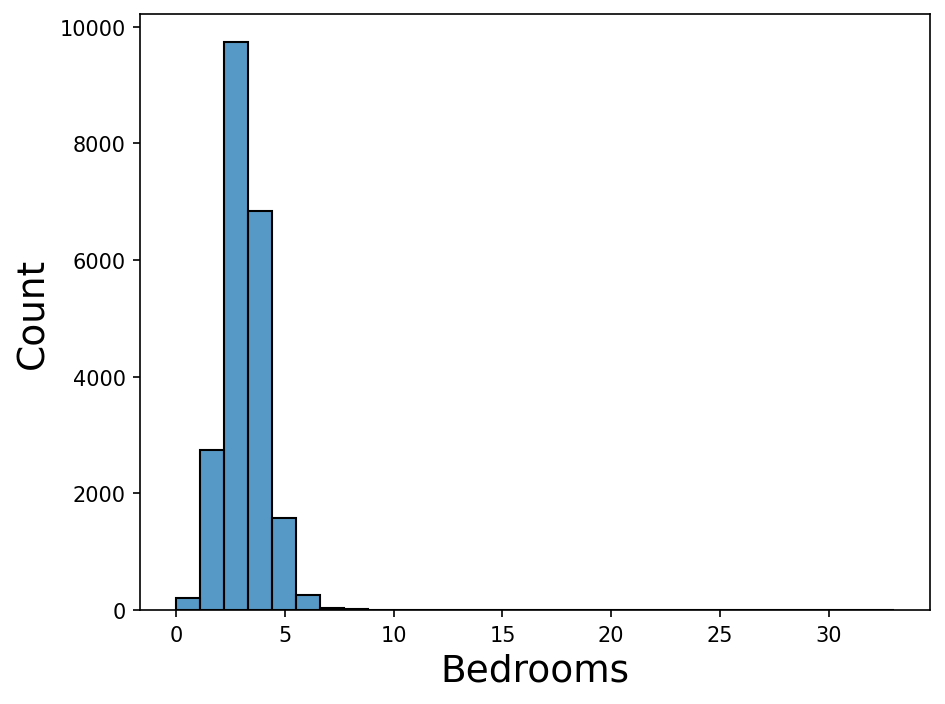

In [10]:
plot_bedrooms = sns.histplot(filtered_df.bedrooms, bins=30)
plot_bedrooms.set(xlabel="Bedrooms", ylabel="Count");

We can see that 13 properties have a bedroom count of zero.  We can exclude these.  We can also see that there is one big outlier with a bedroom count of 33 that we should definitely exclude.  However, there are only 10 properties with more than 8 bedrooms (6 with 9, 3 with 10, and 1 with 11).  We don't have a large enough sample to split into valid train/test groups for those so we will also exclude those extremes.

We will also convert the remaining columns to a categorical type.

In [11]:
filtered_df = filtered_df[(filtered_df.bedrooms >= 1) & (filtered_df.bedrooms <= 8)]
filtered_df.shape

(21412, 22)

In [12]:
filtered_df.bedrooms = filtered_df.bedrooms.astype('category')
filtered_df.bedrooms.cat.categories

Index([1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

### Bathrooms Analysis

Let us look at the distinct values for bathrooms and a histogram plot.

In [13]:
filtered_df.bathrooms.value_counts()

bathrooms
2.50    5352
1.00    3794
1.75    3019
2.25    2031
2.00    1912
1.50    1429
2.75    1182
3.00     743
3.50     729
3.25     586
3.75     155
4.00     133
4.50      97
4.25      79
0.75      70
4.75      23
5.00      21
5.25      12
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
0.00       3
6.75       2
8.00       2
6.25       2
6.50       2
7.75       1
Name: count, dtype: int64

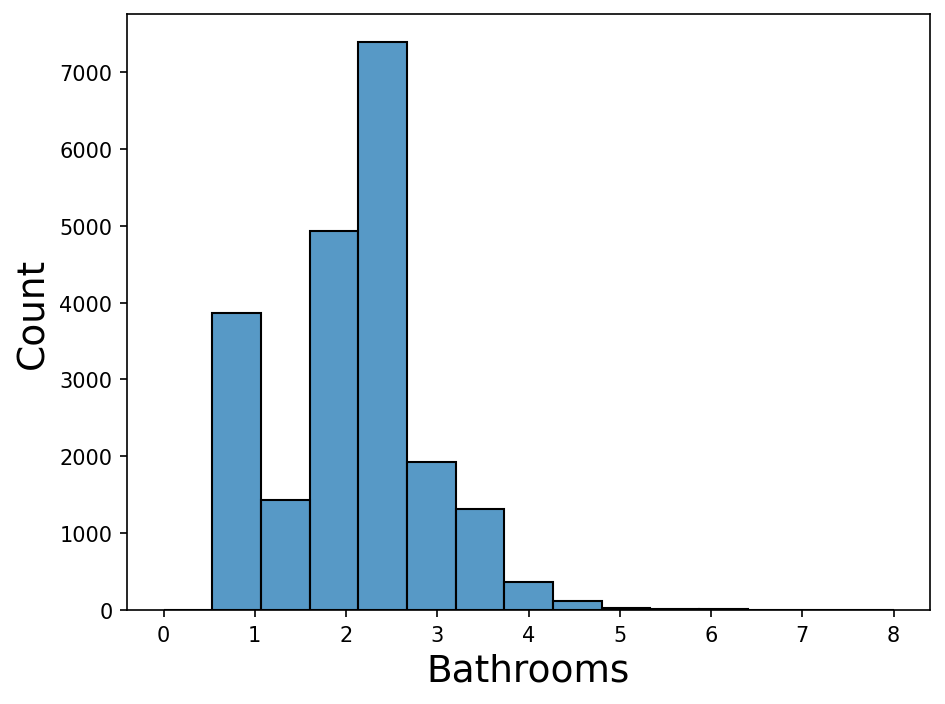

In [14]:
plot_bathrooms = sns.histplot(filtered_df.bathrooms, bins=15)
plot_bathrooms.set(xlabel="Bathrooms", ylabel="Count");

We can see that there are 3 remaining properties with zero bathrooms listed that we can likely filter out.  There are also a whole number of bathrooms between 1 and 8 but with only 15 with 6 or more.  We can also see that there is a fractional bathroom (quarter, half, three-quarters) with 4 at 0.50 and 70 at 0.75.  This is interesting, because we can ignore the 0 bathrooms items, but if we split out the partial bathrooms from the full bathrooms we will be left with zero whole bathrooms and that will be valid data.

In [15]:
filtered_df = filtered_df[(filtered_df.bathrooms > 0) & (filtered_df.bathrooms < 6)]
filtered_df.shape

(21394, 22)

So we are down to 21394 rows.  Let us create a new `whole_bathrooms` feature.

In [16]:
filtered_df['whole_bathrooms'] = filtered_df.bathrooms.apply(lambda value: np.trunc(value)).astype('int64').astype('category')
filtered_df.whole_bathrooms.cat.categories

Index([0, 1, 2, 3, 4, 5], dtype='int64')

And let us convert the partial bathroom information into a categorical feature `partial_bathroom`: 0 - none, 1 - 0.25, 2 - 0.50, 3 - 0.75.

In [17]:
filtered_df['partial_bathroom'] = filtered_df.bathrooms.apply(lambda value: 4 * (value - np.trunc(value))).astype('int64').astype('category')
filtered_df.partial_bathroom.cat.categories

Index([0, 1, 2, 3], dtype='int64')

### Square Footage - Living Space Analysis

Let us look at `sqft_living`.

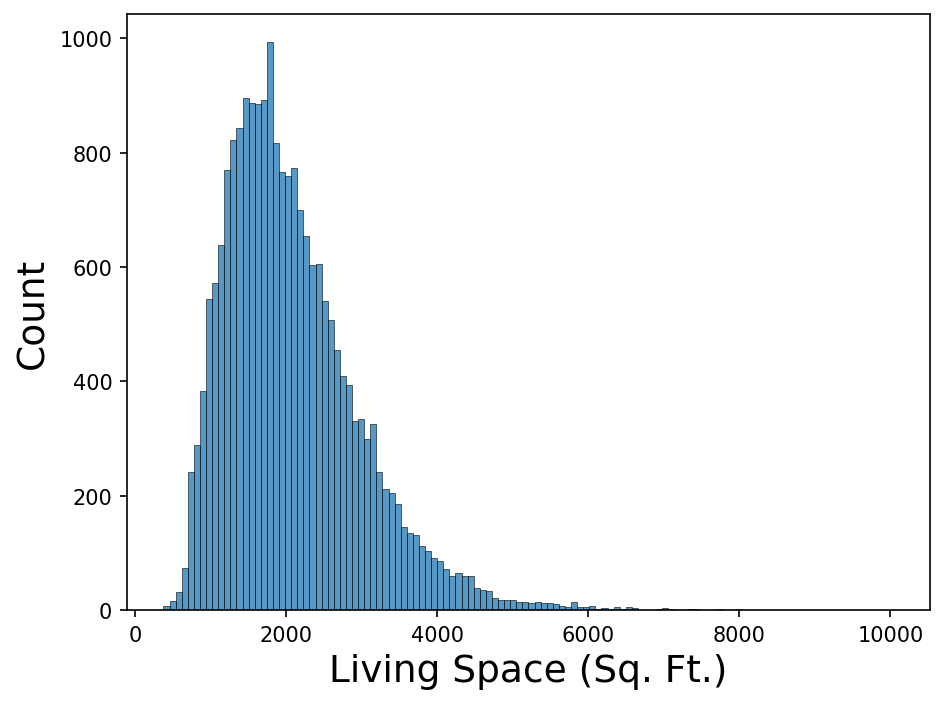

In [18]:
living_plot = sns.histplot(filtered_df.sqft_living)
living_plot.set(xlabel="Living Space (Sq. Ft.)", ylabel="Count");

We can see we have a skewed distribution that trails off around 6,000 square feet.  We can truncate that tail.

In [19]:
filtered_df = filtered_df[(filtered_df.sqft_living > 0) & (filtered_df.sqft_living <= 6000)]
filtered_df.shape

(21339, 24)

And we can see we are down to 21,339 rows.

### Square Footage - Lot Size Analysis

Let us look at `sqft_lot`.

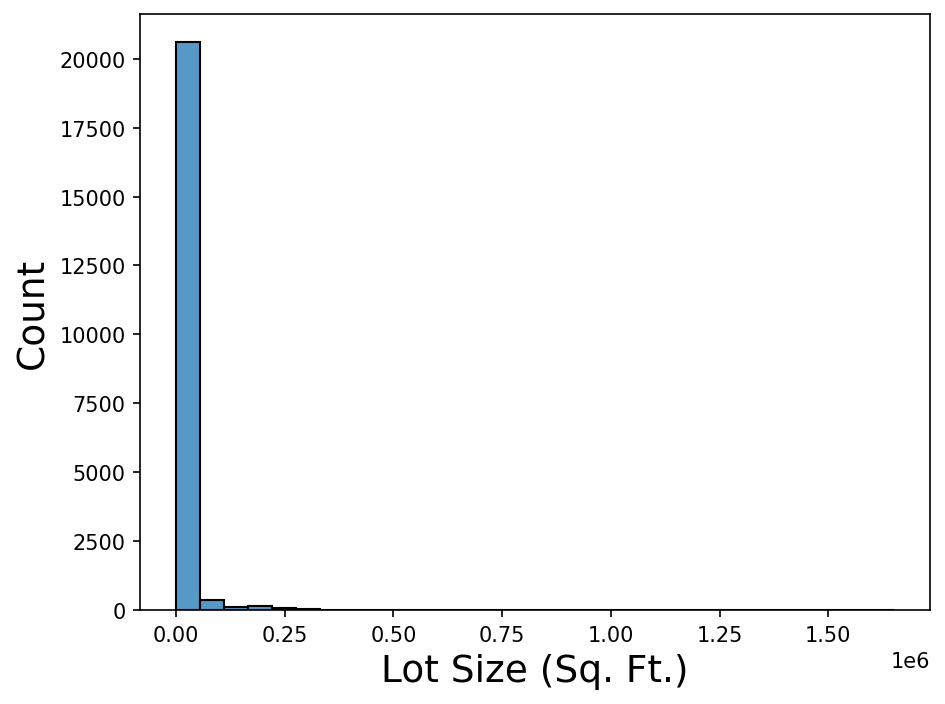

In [20]:
lot_plot = sns.histplot(filtered_df.sqft_lot, bins=30)
lot_plot.set(xlabel="Lot Size (Sq. Ft.)", ylabel="Count");

There is something drastically wrong with some outliers in this distribution.  Let us find those outliers and try again.

In [21]:
filtered_df[filtered_df.sqft_lot > 300000].shape

(69, 24)

So there are about 69 reamining properties with lot sizes over 300K sq. ft.  Let us exclude those and generate a new histogram.

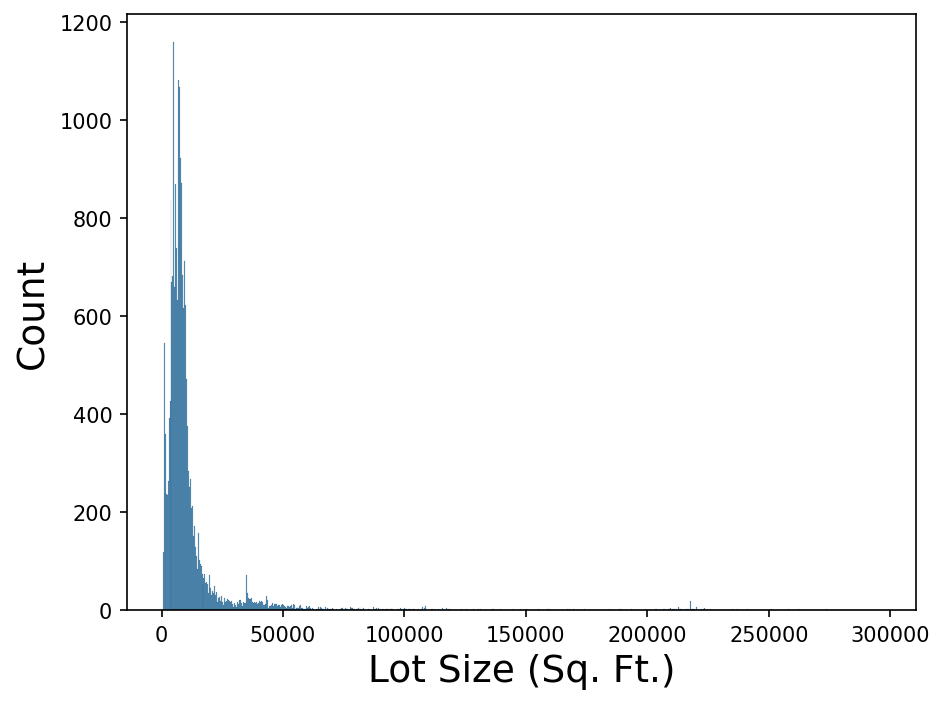

In [22]:
filtered_df = filtered_df[filtered_df.sqft_lot <= 300000]
lot_plot = sns.histplot(filtered_df.sqft_lot)
lot_plot.set(xlabel="Lot Size (Sq. Ft.)", ylabel="Count");

That gives us a slightly better view of the histogram, but we can still see it is heavily skewed.  Let us drop that tail down to 100K sq. ft.

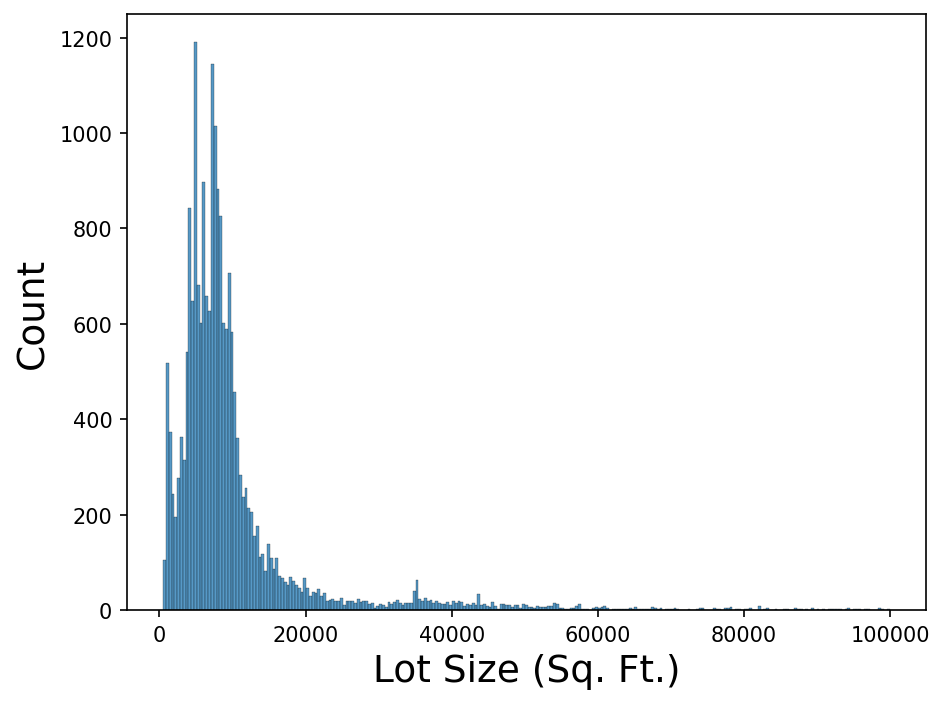

In [23]:
filtered_df = filtered_df[filtered_df.sqft_lot <= 100000]
lot_plot = sns.histplot(filtered_df.sqft_lot)
lot_plot.set(xlabel="Lot Size (Sq. Ft.)", ylabel="Count");

This is still immensely skewed, but we will leave the rest of the data for now.  In part 4 (feature engineering) we can convert the lot size into a categorical variable using bins.

In [24]:
filtered_df.shape

(20891, 24)

We can see we are down to 20,891 rows.

### Floors Analysis

Let us analyze `floors`.

In [25]:
filtered_df.floors.value_counts()

floors
1.0    10362
2.0     7947
1.5     1828
3.0      604
2.5      144
3.5        6
Name: count, dtype: int64

This is another interesting case where we have half-floors being recorded.  Let us split this up like we did with bathrooms.

In [26]:
filtered_df['whole_floors'] = filtered_df.floors.apply(lambda value: np.trunc(value)).astype('int64').astype('category')
filtered_df.whole_floors.cat.categories

Index([1, 2, 3], dtype='int64')

In [27]:
filtered_df['partial_floors'] = filtered_df.floors.apply(lambda value: 2 * (value - np.trunc(value))).astype('int64').astype('category')
filtered_df.partial_floors.cat.categories

Index([0, 1], dtype='int64')

### Waterfront Analysis

Let us analyze `waterfront`.

In [28]:
filtered_df.waterfront.value_counts()

waterfront
0    20739
1      152
Name: count, dtype: int64

We only appear to have 152 remaining properties with a waterfront view.  We can just convert this to a categorical and move on.

In [29]:
filtered_df.waterfront = filtered_df.waterfront.astype('category')
filtered_df.waterfront.cat.categories

Index([0, 1], dtype='int64')

### View Analysis

Let us analyze the `view` feature.

In [30]:
filtered_df.view.value_counts()

view
0    18891
2      912
3      466
1      326
4      296
Name: count, dtype: int64

This one is interesting.  The majority of all properties have a zero value which likely means there is no view.  The remaining properties have values from 1 to 4.  We will also convert this to a categorical variable since the scale between better views isn't likely going to be linear.

In [31]:
filtered_df.view = filtered_df.view.astype('category')
filtered_df.view.cat.categories

Index([0, 1, 2, 3, 4], dtype='int64')

### Condition Analysis

Let us analyze `condition`.

In [32]:
filtered_df.condition.value_counts()

condition
3    13534
4     5517
5     1663
2      150
1       27
Name: count, dtype: int64

This one also seems like a good candidate for conversion to a categorical variable.

In [33]:
filtered_df.condition = filtered_df.condition.astype('category')
filtered_df.condition.cat.categories

Index([1, 2, 3, 4, 5], dtype='int64')

### Grade Analysis

Let us analyze `grade`.

In [34]:
filtered_df.grade.value_counts()

grade
7     8758
8     5928
9     2507
6     1967
10    1066
11     348
5      227
12      59
4       27
13       3
3        1
Name: count, dtype: int64

This will make a good categorical variable.  However, there was only a single property with a value of 3 (and none with 1 or 2) which were in the "falls short of building construction and design" group.  We should ignore this one.  Potentially in part 4 we can generate a feature for average and high (bin). 

In [35]:
filtered_df = filtered_df[filtered_df.grade != 3]
filtered_df.shape

(20890, 26)

In [36]:
filtered_df.grade = filtered_df.grade.astype('category')
filtered_df.grade.cat.categories

Index([4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

### Square Footage - Above Ground Level Analysis

Let us analyze `sqft_above`.

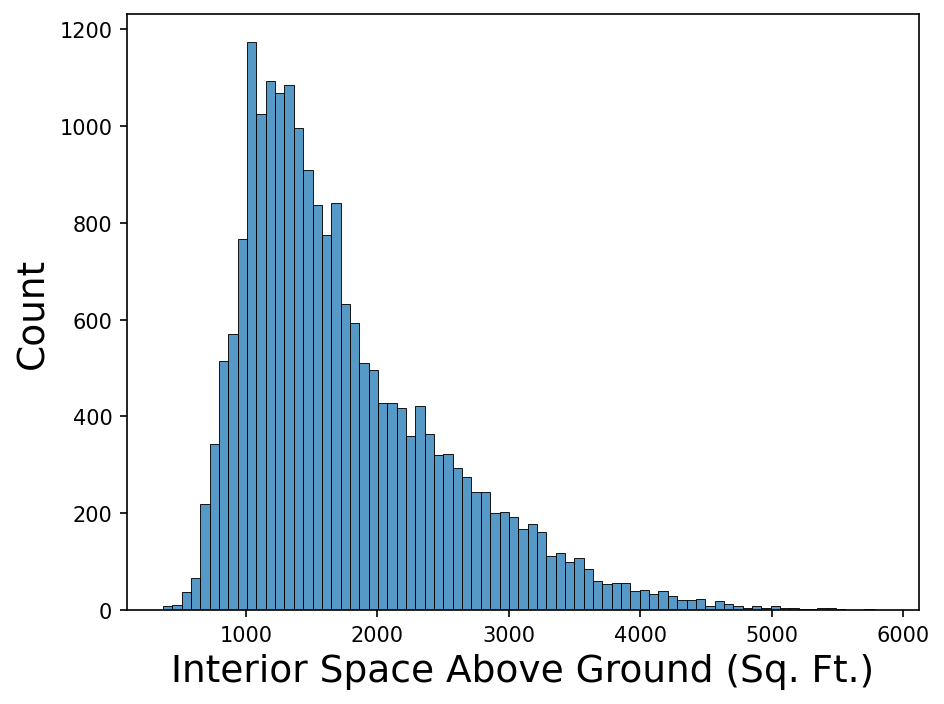

In [37]:
above_plot = sns.histplot(filtered_df.sqft_above)
above_plot.set(xlabel="Interior Space Above Ground (Sq. Ft.)", ylabel="Count");

This one looks skewed but does not have any visible outliers that need to be removed.

### Square Footage - Basement Analysis

Let us analyze `sqft_basement`.

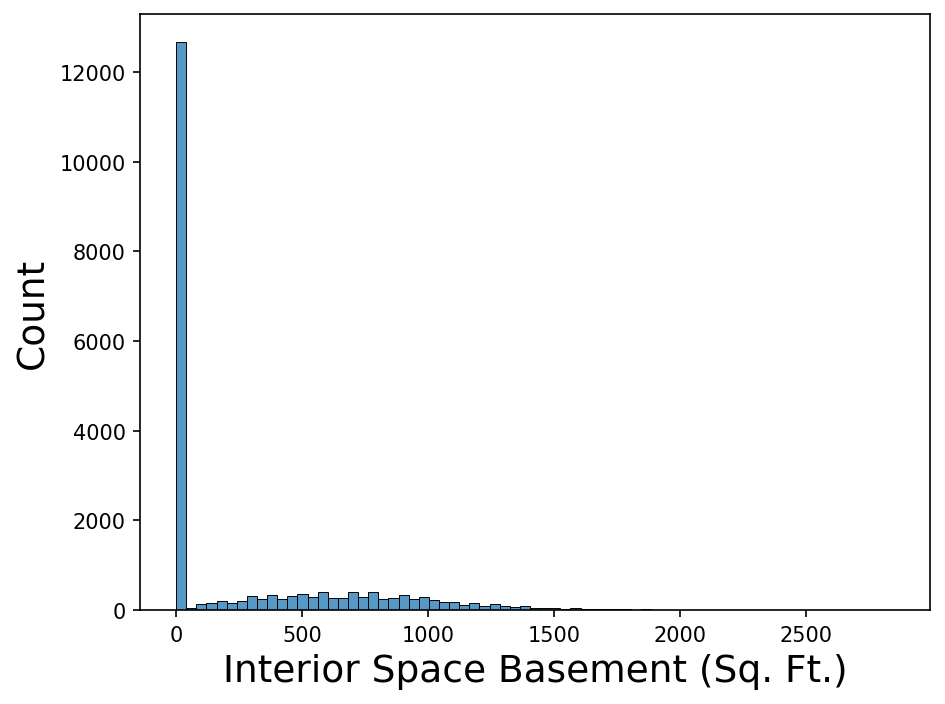

In [38]:
basement_plot = sns.histplot(filtered_df.sqft_basement)
basement_plot.set(xlabel="Interior Space Basement (Sq. Ft.)", ylabel="Count");

Well that doesn't look great.  It appears that more than 12,000 of the remaining properties don't have a basement.  This isn't bad data, so I can't just exclude it.  However, I am not sure (off the top of my head) how I will be able to account for this in the regression models.  Let us look at the remaining histogram excluding just those.

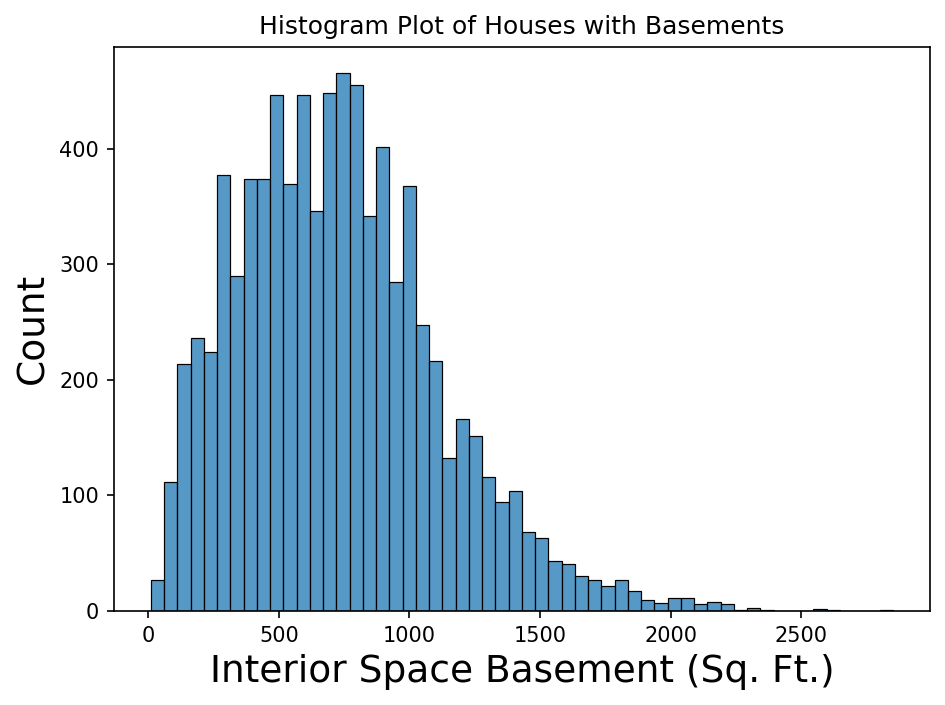

In [39]:
basement_plot = sns.histplot(filtered_df[filtered_df.sqft_basement > 0].sqft_basement)
basement_plot.set(xlabel="Interior Space Basement (Sq. Ft.)", ylabel="Count", title="Histogram Plot of Houses with Basements");

This looks much better.  I will still need to figure out a way to handle this data.

### Year Built Analysis

Let us analyze `yr_built`.

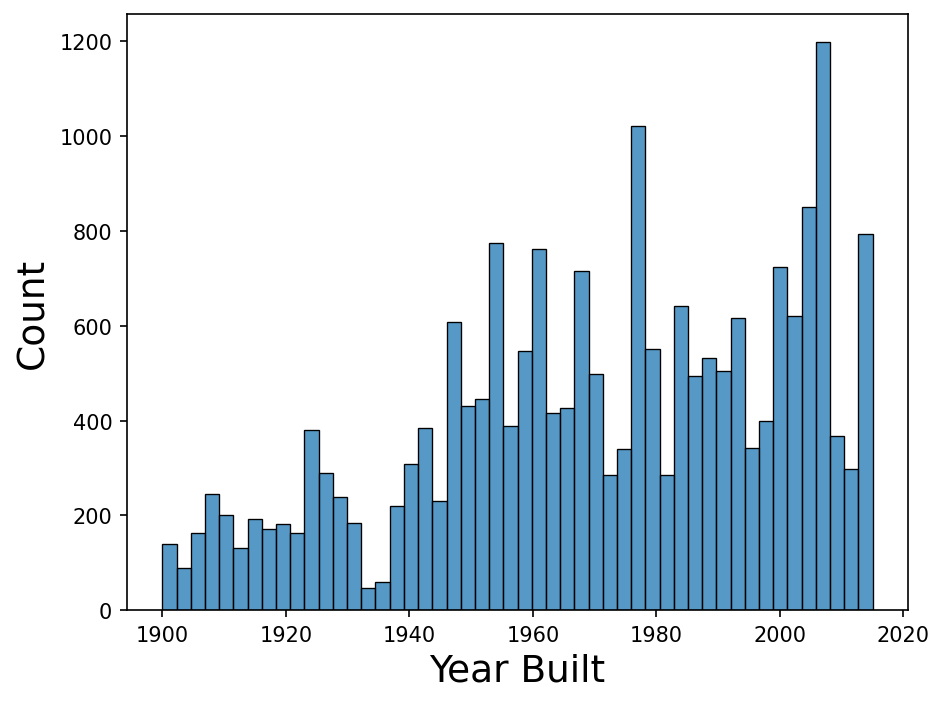

In [40]:
built_plot = sns.histplot(filtered_df.yr_built, bins=50)
built_plot.set(xlabel="Year Built", ylabel="Count");

This was not what I expected when I saw properties built in 1900 (I assume that would have been missing data and just a placeholder value).  However, seeing this histogram I can see that the houses are following a natural progression towards more recent.  This could be accounted for with the fact that there are just fewer homes built in older years.  I think we will leave this column be for now, but in part 4 I will likely generate an age feature to use instead.

### Year Renovated Analysis

Let us analyze `yr_renovated`.

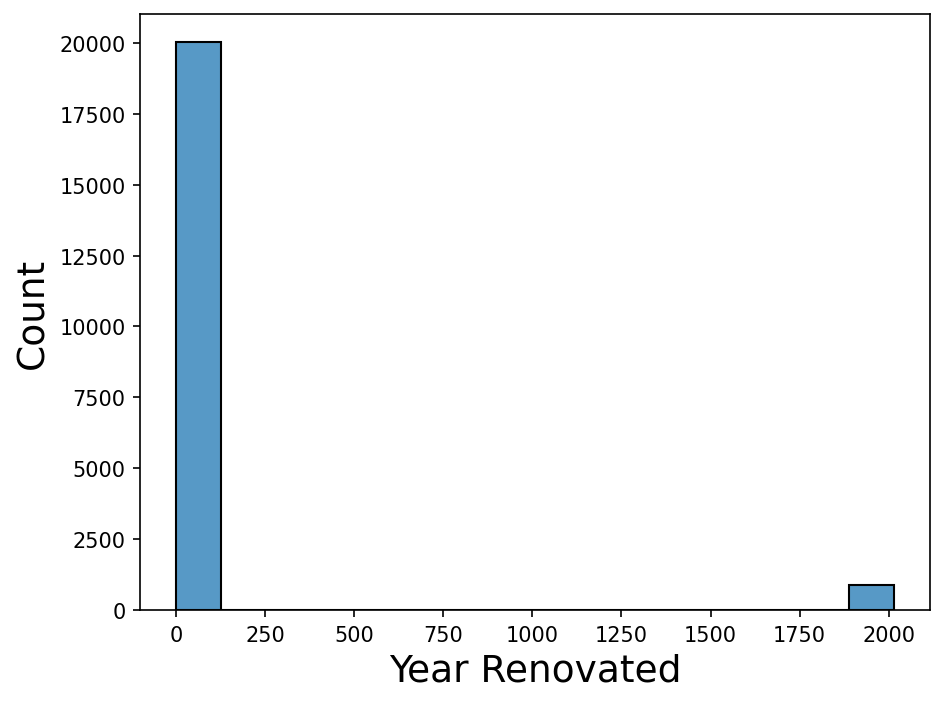

In [41]:
ren_plot = sns.histplot(filtered_df.yr_renovated)
ren_plot.set(xlabel="Year Renovated", ylabel="Count");

Almost all of the data is zero.  Let us see if there is anything useful with the remaining data.

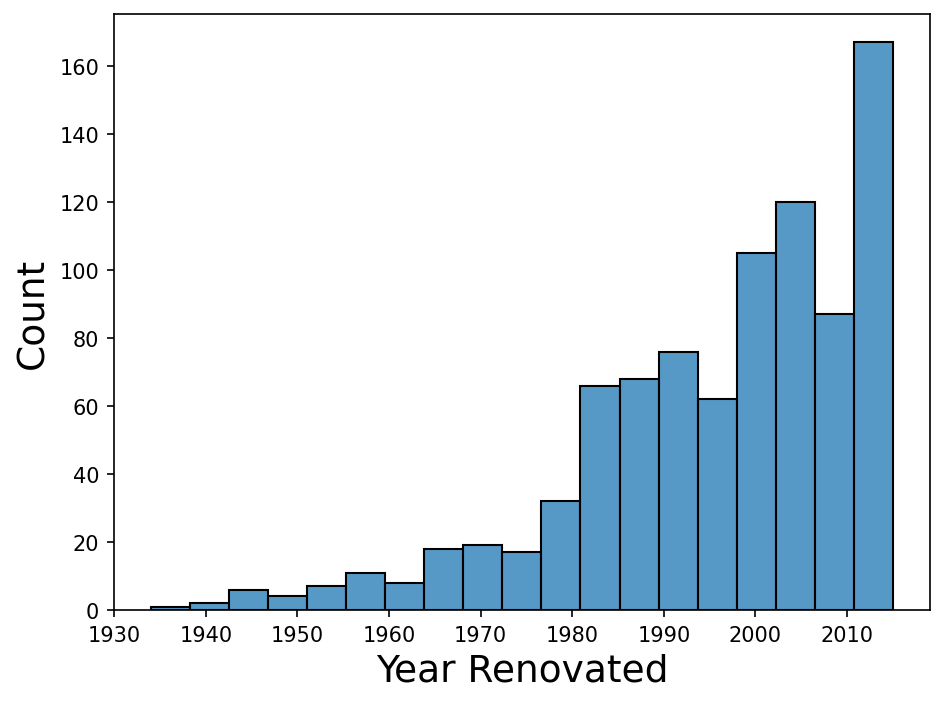

In [42]:
ren_plot = sns.histplot(filtered_df[filtered_df.yr_renovated > 0].yr_renovated)
ren_plot.set(xlabel="Year Renovated", ylabel="Count");

There we go, we can see an upward trend in more recent renovations.  I need to figure out how to manage missing data for this feature.

### Zip Code Analysis

Let us analyze `zipcode`.

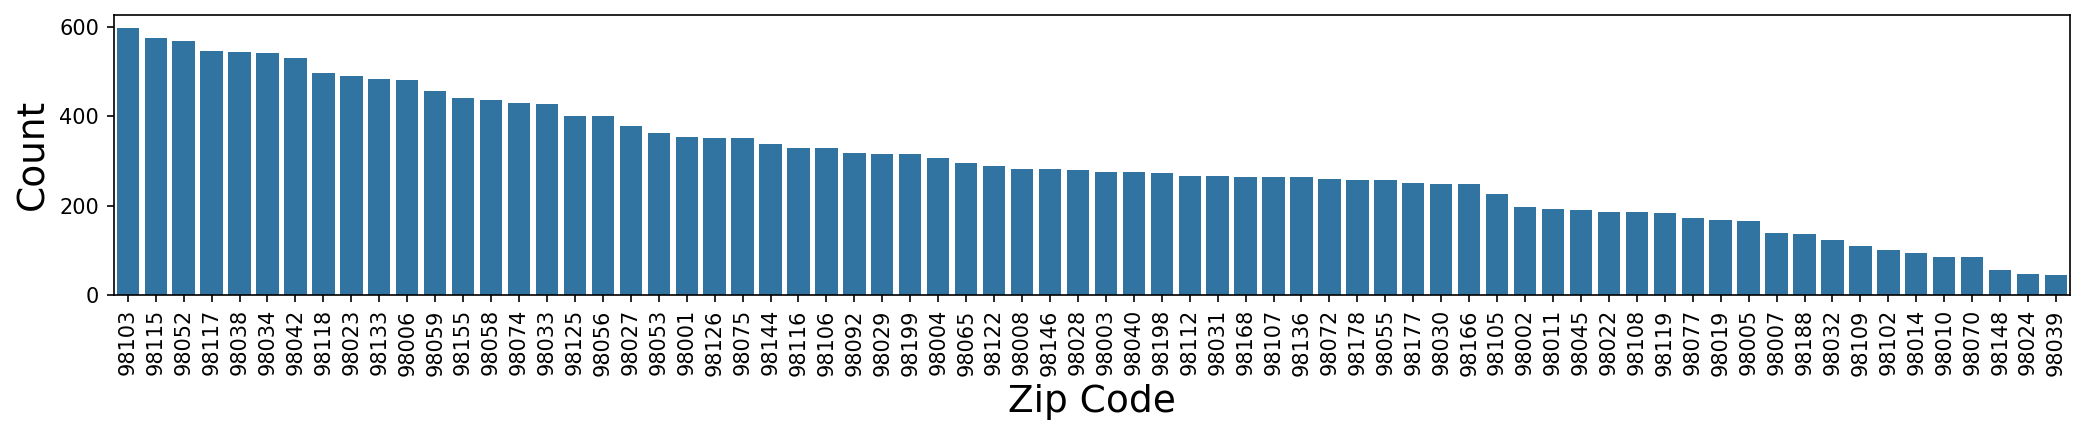

In [43]:
zip_counts = filtered_df.zipcode.value_counts()
_, ax = plt.pyplot.subplots(figsize=(14, 3))
zip_plot = sns.countplot(data=filtered_df, x="zipcode", ax=ax, order=zip_counts.index, color=sns.color_palette()[0])
zip_plot.set(xlabel="Zip Code", ylabel="Count");
zip_plot.tick_params(axis='x', rotation=90)

We can see a pretty good zip code distribution.  Let us conver this to a categorical value.

In [44]:
filtered_df.zipcode = filtered_df.zipcode.astype('category')
filtered_df.zipcode.cat.categories

Index([98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010, 98011,
       98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029, 98030, 98031,
       98032, 98033, 98034, 98038, 98039, 98040, 98042, 98045, 98052, 98053,
       98055, 98056, 98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077,
       98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115,
       98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144,
       98146, 98148, 98155, 98166, 98168, 98177, 98178, 98188, 98198, 98199],
      dtype='int64')

### Latitude Analysis

Let us analyze `lat`.

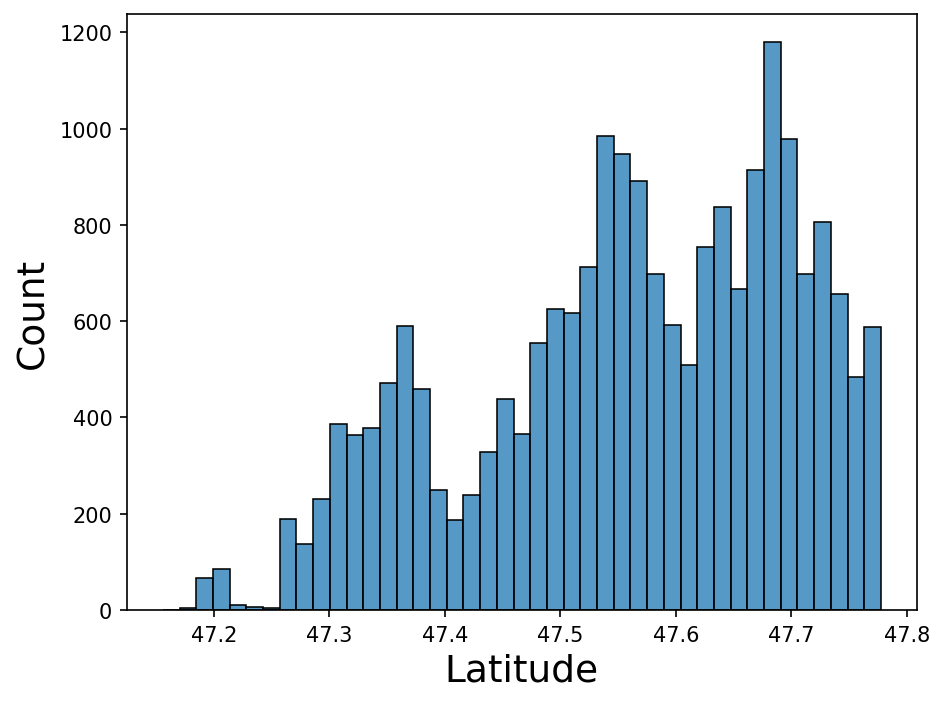

In [45]:
lat_plot = sns.histplot(filtered_df.lat)
lat_plot.set(xlabel="Latitude", ylabel="Count");

Not much to say about this graph.  We can see that it is multi-modal.

### Longitude Analysis

Let us analyze `long`.

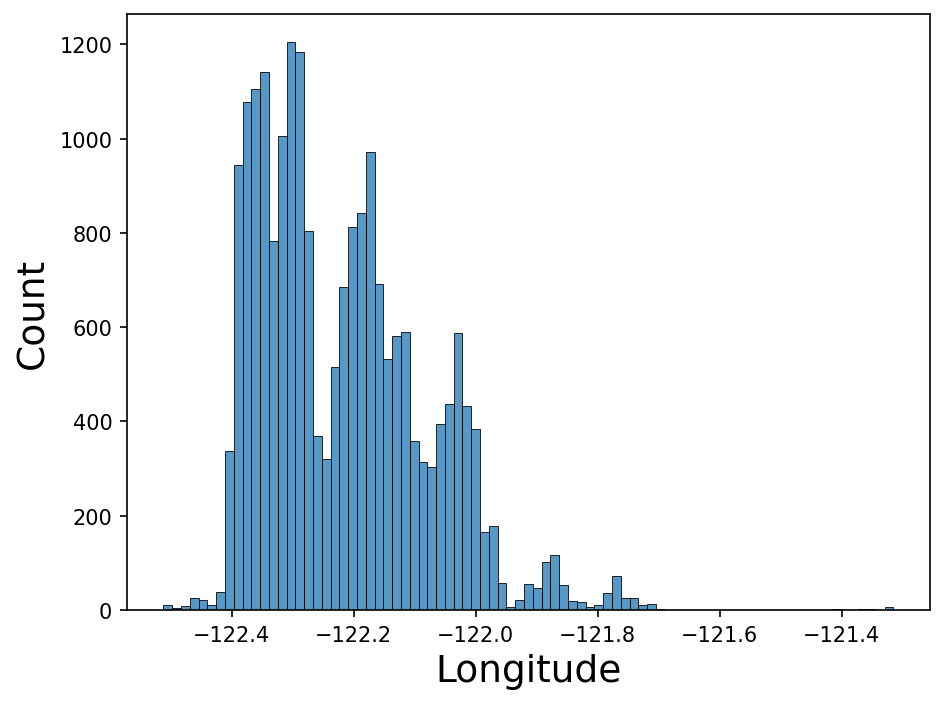

In [46]:
long_plot = sns.histplot(filtered_df.long)
long_plot.set(xlabel="Longitude", ylabel="Count");

Here we can definitely see there is a spatial outlier past -121.6.  We can exclude that one outlier.  Otherwise, the data looks very multi-modal (just like latitude).

In [47]:
filtered_df = filtered_df[filtered_df.long < -121.6]
filtered_df.shape

(20873, 26)

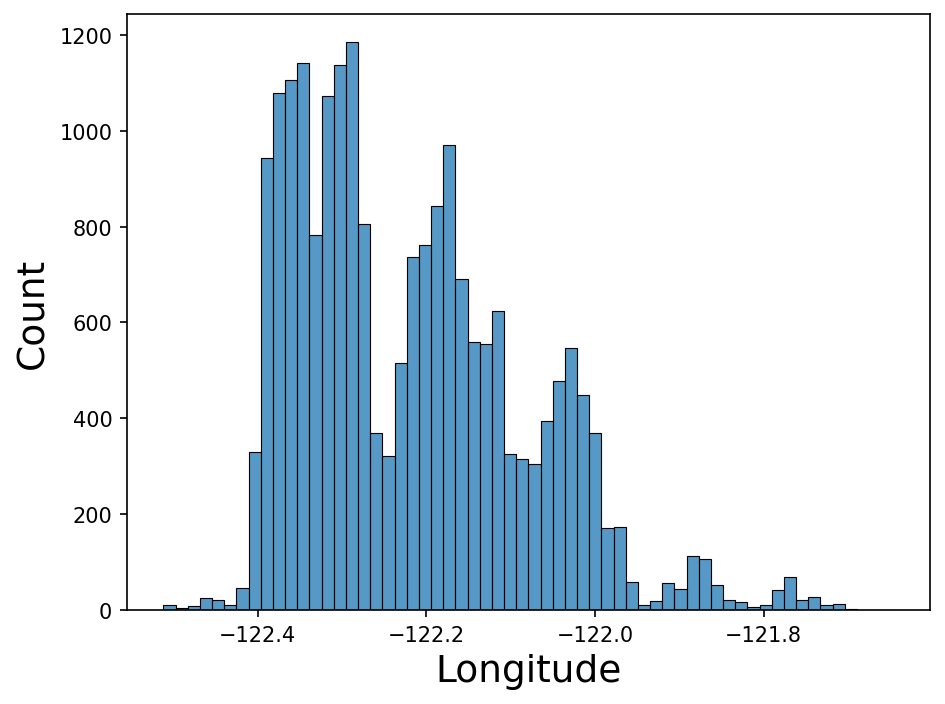

In [48]:
long_plot = sns.histplot(filtered_df.long)
long_plot.set(xlabel="Longitude", ylabel="Count");

And we are down to 20,873 rows after all of our filtering and conversion.

## Part 1 Summary

In [49]:
filtered_df = filtered_df.reset_index().copy()
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20873 entries, 0 to 20872
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   index             20873 non-null  int64   
 1   id                20873 non-null  int64   
 2   date              20873 non-null  object  
 3   price             20873 non-null  float64 
 4   bedrooms          20873 non-null  category
 5   bathrooms         20873 non-null  float64 
 6   sqft_living       20873 non-null  int64   
 7   sqft_lot          20873 non-null  int64   
 8   floors            20873 non-null  float64 
 9   waterfront        20873 non-null  category
 10  view              20873 non-null  category
 11  condition         20873 non-null  category
 12  grade             20873 non-null  category
 13  sqft_above        20873 non-null  int64   
 14  sqft_basement     20873 non-null  int64   
 15  yr_built          20873 non-null  int64   
 16  yr_renovated      2087

Let us also look at a final price histogram.

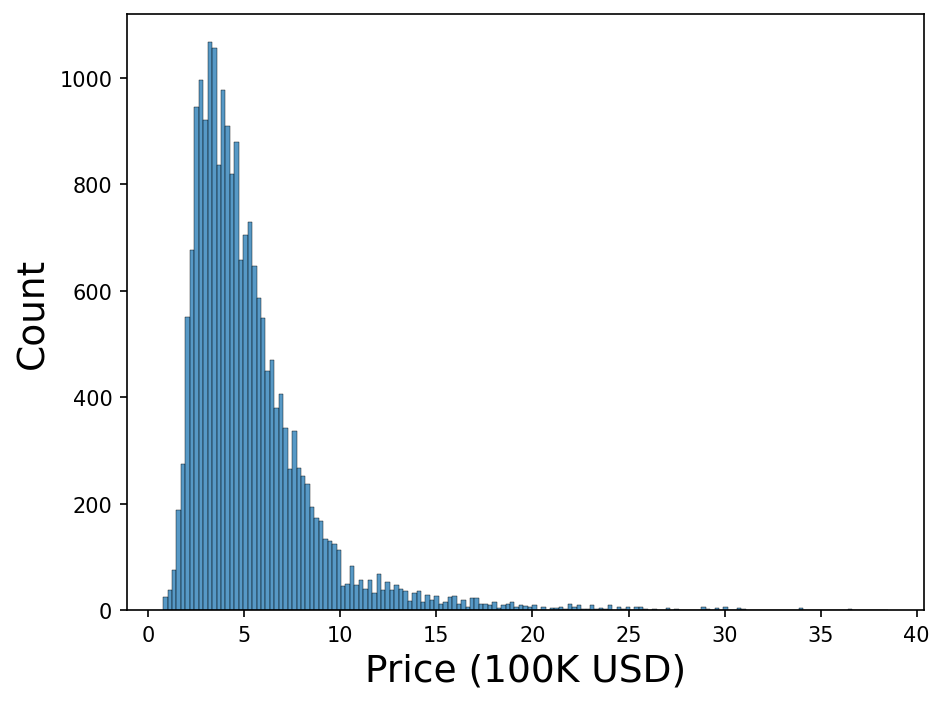

In [50]:
price_plot = sns.histplot(filtered_df.price.apply(lambda value: value / 100000))
price_plot.set(xlabel="Price (100K USD)", ylabel="Count");

Now let us save this to a feather file to continue on with the rest of the assignment.

In [51]:
filtered_df.to_feather("kc_house_data-cleaned.feather")